In [ ]:
#pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats.stats import f_oneway,F_onewayResult
from pandas import Series        # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# regression error metrics - scikit-learn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import scipy.stats

# regression error metrics - scikit-learn
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.eval_measures import meanabs

# Some tests/statistics required for validating assumptions
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', None)  # or 1000

# **Import Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Lego/Lego Data/lego_sales_data_uconn.csv',encoding= 'unicode_escape')

In [ ]:
df.shape

(596912, 14)

In [ ]:
df

cal_year  cal_month  cal_week  yearweek week_start_date week_end_date  \
0           2017          1         1    201701      2017-01-01    2017-01-07   
1           2017          1         2    201702      2017-01-08    2017-01-14   
2           2017          1         3    201703      2017-01-15    2017-01-21   
3           2017          1         4    201704      2017-01-22    2017-01-28   
4           2017          2         5    201705      2017-01-29    2017-02-04   
...          ...        ...       ...       ...             ...           ...   
596907      2022          4        15    202215      2022-04-10    2022-04-16   
596908      2022          4        16    202216      2022-04-17    2022-04-23   
596909      2022          4        17    202217      2022-04-24    2022-04-30   
596910      2022          5        18    202218      2022-05-01    2022-05-07   
596911      2022          5        19    202219      2022-05-08    2022-05-14   

        communication_id    communication_desc top_theme product_audience  \
0                  10214          Tower Bridge     ICONS      Adult (18+)   
1                  10214          Tower Bridge     ICONS      Adult (18+)   
2                  10214          Tower Bridge     ICONS      Adult (18+)   
3                  10214          Tower Bridge     ICONS      Adult (18+)   
4                  10214          Tower Bridge     ICONS      Adult (18+)   
...                  ...                   ...       ...              ...   
596907             99990  Number allocated for    OTHERS           Others   
596908             99990  Number allocated for    OTHERS           Others   
596909             99990  Number allocated for    OTHERS           Others   
596910             99990  Number allocated for    OTHERS           Others   
596911             99990  Number allocated for    OTHERS           Others   

       pricepoint pricepoint_sort  sales_qty  sales_nip  
0           > 200        g) > 200         37    5461.33  
1           > 200        g) > 200         27    4016.21  
2           > 200        g) > 200         41    6135.35  
3           > 200        g) > 200         32    4795.13  
4           > 200        g) > 200         33    4907.83  
...           ...             ...        ...        ...  
596907        NaN             NaN          1       0.01  
596908        NaN             NaN          1       0.01  
596909        NaN             NaN          1       0.01  
596910        NaN             NaN          1       0.01  
596911        NaN             NaN          1       0.01  

[596912 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596912 entries, 0 to 596911
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cal_year            596912 non-null  int64  
 1   cal_month           596912 non-null  int64  
 2   cal_week            596912 non-null  int64  
 3   yearweek            596912 non-null  int64  
 4   week_start_date     596912 non-null  object 
 5   week_end_date       596912 non-null  object 
 6   communication_id    596912 non-null  int64  
 7   communication_desc  596912 non-null  object 
 8   top_theme           596912 non-null  object 
 9   product_audience    596912 non-null  object 
 10  pricepoint          595885 non-null  object 
 11  pricepoint_sort     595885 non-null  object 
 12  sales_qty           596912 non-null  int64  
 13  sales_nip           596912 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 63.8+ MB


# **Missing Value**

In [ ]:
df.isnull().sum()

cal_year                 0
cal_month                0
cal_week                 0
yearweek                 0
week_start_date          0
week_end_date            0
communication_id         0
communication_desc       0
top_theme                0
product_audience         0
pricepoint            1027
pricepoint_sort       1027
sales_qty                0
sales_nip                0
dtype: int64

In [ ]:
df_missing = df[df.isnull().values==True].drop_duplicates()

df_missing

cal_year  cal_month  cal_week  yearweek week_start_date week_end_date  \
57617       2022          7        30    202230      2022-07-24    2022-07-30   
57619       2022          8        31    202231      2022-07-31    2022-08-06   
57620       2022          8        32    202232      2022-08-07    2022-08-13   
57623       2022          8        33    202233      2022-08-14    2022-08-20   
57626       2022          9        35    202235      2022-08-28    2022-09-03   
...          ...        ...       ...       ...             ...           ...   
596907      2022          4        15    202215      2022-04-10    2022-04-16   
596908      2022          4        16    202216      2022-04-17    2022-04-23   
596909      2022          4        17    202217      2022-04-24    2022-04-30   
596910      2022          5        18    202218      2022-05-01    2022-05-07   
596911      2022          5        19    202219      2022-05-08    2022-05-14   

        communication_id    communication_desc top_theme  product_audience  \
57617              10886  My First Car Creatio     DUPLO  Kids 0-2 (DUPLO)   
57619              10886  My First Car Creatio     DUPLO  Kids 0-2 (DUPLO)   
57620              10886  My First Car Creatio     DUPLO  Kids 0-2 (DUPLO)   
57623              10886  My First Car Creatio     DUPLO  Kids 0-2 (DUPLO)   
57626              10886  My First Car Creatio     DUPLO  Kids 0-2 (DUPLO)   
...                  ...                   ...       ...               ...   
596907             99990  Number allocated for    OTHERS            Others   
596908             99990  Number allocated for    OTHERS            Others   
596909             99990  Number allocated for    OTHERS            Others   
596910             99990  Number allocated for    OTHERS            Others   
596911             99990  Number allocated for    OTHERS            Others   

       pricepoint pricepoint_sort  sales_qty  sales_nip  
57617         NaN             NaN          1       8.99  
57619         NaN             NaN          2      17.99  
57620         NaN             NaN          2      17.99  
57623         NaN             NaN          3      35.97  
57626         NaN             NaN          1       8.99  
...           ...             ...        ...        ...  
596907        NaN             NaN          1       0.01  
596908        NaN             NaN          1       0.01  
596909        NaN             NaN          1       0.01  
596910        NaN             NaN          1       0.01  
596911        NaN             NaN          1       0.01  

[1027 rows x 14 columns]

In [ ]:
missing_theme = df_missing['top_theme'].value_counts().index.tolist()

In [ ]:
for i in missing_theme:
  a = df_missing[df_missing['top_theme']==i].shape[0]
  b = df[df['top_theme']==i].shape[0]
  c = a/b
  print(i, c)

LEL INSTORE EXPERIENCES 0.03145247530980688
OTHERS 0.05890736342042755
MERCHANDISE 0.0008063340943313741
CITY 0.0015691929259086476
DOTS 0.008387342737323675
DUPLO 0.0010996447301641007
SUPER HEROES 0.0010272543417546788
DISNEY ANIMATION 0.0024738648152581597
FRIENDS 0.0006852131012744963
NINJAGO 0.0007263362937039849
CREATOR 0.0008164514976782161
LEGO CLASSIC 0.0011246293834986198
STAR WARS TM 0.00024606849652148626
SUPER MARIO 0.0019753086419753087
SPEED CHAMPIONS 0.0006308153288124901
ARCHITECTURE 0.00026784518548279097
HARRY POTTER TM 0.00017809439002671417


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(595885, 14)

# **Data Types**

In [ ]:
df['pricepoint'] = df['pricepoint'].astype('category')
df['top_theme'] = df['top_theme'].astype('category')
df['product_audience'] = df['product_audience'].astype('category')
df['pricepoint_sort'] = df['pricepoint_sort'].astype('category')

In [ ]:
df_exp = df.copy()

In [ ]:
df_exp['Date'] = pd.to_datetime(df_exp.cal_year.astype(str)+'-'+df_exp.cal_month.astype(str))
#df_exp['Date'] = df_exp['Date'].dt.strftime('%Y-%m')
df_exp

cal_year  cal_month  cal_week  yearweek week_start_date week_end_date  \
0           2017          1         1    201701      2017-01-01    2017-01-07   
1           2017          1         2    201702      2017-01-08    2017-01-14   
2           2017          1         3    201703      2017-01-15    2017-01-21   
3           2017          1         4    201704      2017-01-22    2017-01-28   
4           2017          2         5    201705      2017-01-29    2017-02-04   
...          ...        ...       ...       ...             ...           ...   
596783      2022          9        37    202237      2022-09-11    2022-09-17   
596784      2022          9        38    202238      2022-09-18    2022-09-24   
596785      2022          9        39    202239      2022-09-25    2022-10-01   
596786      2022         10        40    202240      2022-10-02    2022-10-08   
596787      2022         10        41    202241      2022-10-09    2022-10-15   

        communication_id communication_desc   top_theme product_audience  \
0                  10214       Tower Bridge       ICONS      Adult (18+)   
1                  10214       Tower Bridge       ICONS      Adult (18+)   
2                  10214       Tower Bridge       ICONS      Adult (18+)   
3                  10214       Tower Bridge       ICONS      Adult (18+)   
4                  10214       Tower Bridge       ICONS      Adult (18+)   
...                  ...                ...         ...              ...   
596783             92177   Ship in a Bottle  LEGO IDEAS      Adult (18+)   
596784             92177   Ship in a Bottle  LEGO IDEAS      Adult (18+)   
596785             92177   Ship in a Bottle  LEGO IDEAS      Adult (18+)   
596786             92177   Ship in a Bottle  LEGO IDEAS      Adult (18+)   
596787             92177   Ship in a Bottle  LEGO IDEAS      Adult (18+)   

        pricepoint pricepoint_sort  sales_qty  sales_nip       Date  
0            > 200        g) > 200         37    5461.33 2017-01-01  
1            > 200        g) > 200         27    4016.21 2017-01-01  
2            > 200        g) > 200         41    6135.35 2017-01-01  
3            > 200        g) > 200         32    4795.13 2017-01-01  
4            > 200        g) > 200         33    4907.83 2017-02-01  
...            ...             ...        ...        ...        ...  
596783  50 - 79.99   d) 50 - 79.99          0       0.00 2022-09-01  
596784  50 - 79.99   d) 50 - 79.99          0       0.00 2022-09-01  
596785  50 - 79.99   d) 50 - 79.99          0       0.00 2022-09-01  
596786  50 - 79.99   d) 50 - 79.99          0       0.00 2022-10-01  
596787  50 - 79.99   d) 50 - 79.99          0       0.00 2022-10-01  

[595885 rows x 15 columns]

# **Pivot**

## **Pivot-top_theme & sales_nip**

In [ ]:
df_select = df_exp[['Date','top_theme','sales_nip']]

In [ ]:
df_select = df_select.groupby(['Date','top_theme']).sum().reset_index()
df_select

Date     top_theme   sales_nip
0    2017-01-01            4+  1294243.72
1    2017-01-01  ARCHITECTURE   679657.10
2    2017-01-01           ART        0.00
3    2017-01-01        AVATAR        0.00
4    2017-01-01  BATMAN MOVIE  3801253.78
...         ...           ...         ...
4055 2022-10-01   SUPER MARIO  2324205.27
4056 2022-10-01       TECHNIC  3177453.69
4057 2022-10-01        TROLLS      833.57
4058 2022-10-01      UNIKITTY       54.64
4059 2022-10-01        VIDIYO    40449.08

[4060 rows x 3 columns]

In [ ]:
df_pivot= pd.pivot(df_select, index='Date', columns='top_theme', values='sales_nip')

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=12, figsize=(50, 50));
plt.subplots_adjust(hspace=0.3,wspace=0.3)

for i,j in zip(df_pivot.columns,axs.ravel()):
    df_pivot[i].plot(ax=j)
    j.set_title(i.upper())



## **Pivot-top_theme & units**

In [ ]:
df_select_1 = df_exp[['Date','top_theme','sales_qty']]
df_select_1= df_select_1.groupby(['Date','top_theme']).sum().reset_index()


In [ ]:
df_pivot_1= pd.pivot(df_select_1, index='Date', columns='top_theme', values='sales_qty')

In [ ]:
df_pivot_1.to_excel('/content/drive/MyDrive/Lego/pivot_theme.xlsx')

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=12, figsize=(50, 50));
plt.subplots_adjust(hspace=0.3,wspace=0.3)

for i,j in zip(df_pivot_1.columns,axs.ravel()):
    df_pivot_1[i].plot(ax=j)
    j.set_title(i.upper())

## **Pivot product-audice & units**

In [ ]:
df_select_2 = df_exp[['Date','product_audience','sales_qty']]
df_select_2= df_select_2.groupby(['Date','product_audience']).sum().reset_index()

In [ ]:
df_pivot_2= pd.pivot(df_select_2, index='Date', columns='product_audience', values='sales_qty')


In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(30, 10));
plt.subplots_adjust(hspace=0.3,wspace=0.3)

for i,j in zip(df_pivot_2.columns,axs.ravel()):
    df_pivot_2[i].plot(ax=j)
    j.set_title(i.upper())

## **Pivot pricepoint & units**

In [ ]:
df_select_3 = df_exp[['Date','pricepoint','sales_qty']]
df_select_3= df_select_3.groupby(['Date','pricepoint']).sum().reset_index()

In [ ]:
df_pivot_3= pd.pivot(df_select_3, index='Date', columns='pricepoint', values='sales_qty')

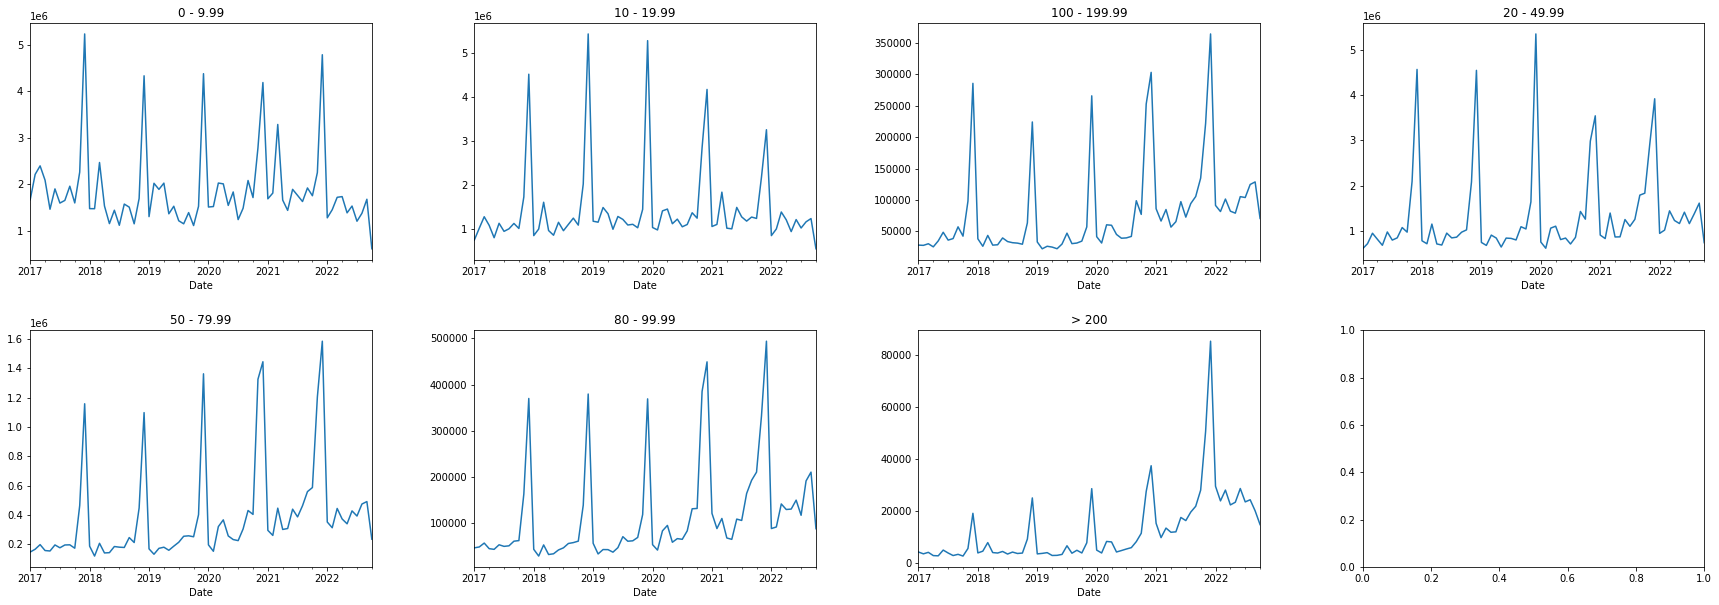

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(30, 10));
plt.subplots_adjust(hspace=0.3,wspace=0.3)

for i,j in zip(df_pivot_3.columns,axs.ravel()):
    df_pivot_3[i].plot(ax=j)
    j.set_title(i.upper())

## **Pivot communication_desc & units**

In [ ]:
df_select_4 = df_exp[['Date','communication_desc','sales_qty']]
df_select_4= df_select_4.groupby(['Date','communication_desc']).sum().reset_index()

In [ ]:
df_pivot_4= pd.pivot(df_select_4, index='Date', columns='communication_desc', values='sales_qty')

In [ ]:
df_select_4['communication_desc'].value_counts()

Myke                    70
The Mushroom Island     70
Race Boat               70
Race Plane              70
Ragana's Magic Shado    70
                        ..
Vintage Car              1
Emma's Summer Play C     1
Andrea's Summer Play     1
BatgirlT Batcycle        1
tbd-LSH-9-2022           1
Name: communication_desc, Length: 3695, dtype: int64

# **EDA**

## **Top 10 units in 2022**

In [ ]:
df_unit_2022 = df_pivot_1['2022']

sum_unit = []
for i in df_unit_2022.columns:
  a = df_unit_2022[i].sum()
  sum_unit.append(a)



In [ ]:
list_theme = df_unit_2022.columns.tolist()

data_tuples = list(zip(list_theme,sum_unit))

sale_2022 = pd.DataFrame(data_tuples, columns=['Top_Theme','Sum_Units'])
sale_2022.sort_values('Sum_Units',ascending=False,inplace = True)


Text(0.5, 1.0, 'Top 10 selling themes for 2022')

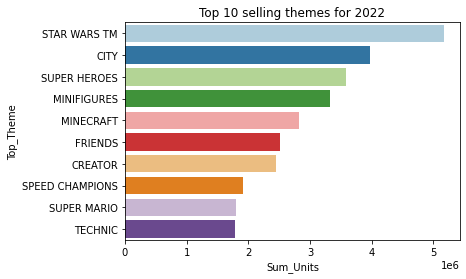

In [ ]:
sns.barplot(sale_2022['Sum_Units'],sale_2022['Top_Theme'].head(10), palette = 'Paired')
plt.title('Top 10 selling themes for 2022')

## **Top 10 units in 2021**

In [ ]:
df_unit_2021 = df_pivot_1['2021']

sum_unit = []
for i in df_unit_2021.columns:
  a = df_unit_2021[i].sum()
  sum_unit.append(a)



In [ ]:
list_theme = df_unit_2021.columns.tolist()

data_tuples = list(zip(list_theme,sum_unit))

sale_2021 = pd.DataFrame(data_tuples, columns=['Top_Theme','Sum_Units'])
sale_2021.sort_values('Sum_Units',ascending=False,inplace = True)


Text(0.5, 1.0, 'Top 10 selling themes for 2021')

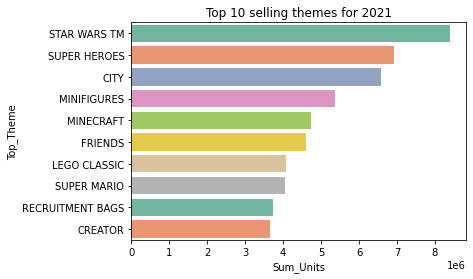

In [ ]:
sns.barplot(sale_2021['Sum_Units'],sale_2021['Top_Theme'].head(10), palette = 'Set2')
plt.title('Top 10 selling themes for 2021')

# **Import External Source Data**

In [ ]:
df_out_data = pd.read_excel('/content/drive/MyDrive/Lego/final_data.xlsx')

In [ ]:
df_out_data.drop('Unnamed: 0',axis = 1,inplace=True)

In [ ]:
# convert to proportion
df_out_data['positive'] = df_out_data['positive']/3000
df_out_data['negative'] = df_out_data['negative']/3000
df_out_data['neutral'] = df_out_data['neutral']/3000

# **Merge External Source Data with LEGO sales**

In [ ]:
df_LEGO_sale = df_exp[['Date','sales_qty','sales_nip']]

In [ ]:
df_sum_sale = df_LEGO_sale.groupby('Date').sum().reset_index()

In [ ]:
df_statistic = pd.merge(df_out_data,df_sum_sale,left_on = df_out_data['Date'],right_on = df_sum_sale['Date'],how = 'left')

In [ ]:
df_statistic.drop(['Date_y','key_0'],axis = 1,inplace = True)
df_statistic.rename(columns={'Date_x':'Date'},inplace=True)

In [ ]:
df_statistic.isnull().sum().sum()

12

In [ ]:
df_statistic_missing = df_statistic[df_statistic.isnull().values==True].drop_duplicates()
df_statistic_missing

Date   Sales  Personal_Saving  Saving_Rate  Disposable_Income  \
0 2017-01-01  1181.0           1000.5          6.9            13747.2   

   Toy_CPI  Personal_Expenditure   PPI  Inflation Rates  open_amazon  \
0   38.903               13020.4  91.7              2.5     40.24865   

   high_amazon  low_amazon  close_amazon  adjclose_amazon  volume_amazon  \
0    40.541325    39.96725      40.37525         40.37525     70614000.0   

   Total_Traded_amazon  returns_amazon  cummulative_return_amazon  \
0         2.842118e+09             NaN                        NaN   

   open_walmart  high_walmart  low_walmart  close_walmart  adjclose_walmart  \
0       67.7675     68.163501      67.3015         67.679         60.435586   

   volume_walmart  Total_Traded_walmart  returns_walmart  \
0       9091400.0          6.161014e+08              NaN   

   cummulative_return_walmart  open_target  high_target  low_target  \
0                         NaN    68.360501      68.7905      67.664   

   close_target  adjclose_target  volume_target  Total_Traded_target  \
0        68.174        58.440253      6764555.0         4.624284e+08   

   returns_target  cummulative_return_target  open_mattel  high_mattel  \
0             NaN                        NaN       29.277       29.782   

   low_mattel  close_mattel  adjclose_mattel  volume_mattel  \
0      28.891       29.3835        28.212954      6799340.0   

   Total_Traded_mattel  returns_mattel  cummulative_return_mattel  open_Mga  \
0         1.990643e+08             NaN                        NaN    43.969   

   high_Mga  low_Mga  close_Mga  adjclose_Mga  volume_Mga  Total_Traded_Mga  \
0    44.306    43.44    43.9105     37.774344   1280985.0      5.632363e+07   

   returns_Mga  cummulative_return_Mga  open_hasbro  high_hasbro  low_hasbro  \
0          NaN                     NaN    82.799001      83.8105      82.183   

   close_hasbro  adjclose_hasbro  volume_hasbro  Total_Traded_hasbro  \
0        83.308        70.939746      1661975.0         1.376099e+08   

   returns_hasbro  cummulative_return_hasbro  Unemp_USA  \
0             NaN                        NaN        4.7   

   Unemp_Occ_Management, Professional_and_Related  \
0                                             2.3   

   Unemp_Occ_Professional_and_Related  Unemp_Occ_Service  \
0                                 2.2                6.3   

   Unemp_Occ_Production  Unemp_Occ_Construction_and_Extraction  \
0                   6.4                                   10.3   

   Unemp_Occ_Farming_Fishing_Forestry  \
0                                15.1   

   Unemp_Occ_Installation_Maintenance_Repair  \
0                                        3.5   

   Unemp_Occ_Management_Business_Financial_Operations  \
0                                                2.5    

   Unemp_Occ_Natural Resources_Construction_and_Maintenance  \
0                                                8.3          

   Unemp_Occ_Office_and_Administrative_Support  \
0                                          4.8   

   Unemp_Occ_Production_Transportation_and_Material_Moving  \
0                                                6.7         

   Unemp_Occ_Sales_and_Office  Unemp_Occ_Sales_and_Related  \
0                         5.0                          5.2   

   Unemp_Occ_Transportation_and_Material_Moving  \
0                                           7.0   

   Unemp_Occ_Education_and_health_services  Unemp_Occ_Information  \
0                                      2.7                    4.9   

   Unemp_Occ_Leisure_and_hospitality  Unemp_Occ_Manufacturing  \
0                                7.9                      4.2   

   Unemp_Occ_Agricultural_and_Related  Unemp_Ind_Construction  \
0                                12.4                     9.4   

   Unemp_ind_Durable_Goods  Unemp_Ind_Financial_Activities  \
0                      4.5                             3.3   

   Unemp_Ind_Education_and_health_services  Unemp_Ind_Government  \
0     

In [ ]:
df_statistic.fillna(method = 'bfill', inplace=True)

In [ ]:
df_statistic.rename(columns={'Sales':'Market Volume'},inplace=True)

In [ ]:
df_statistic.head()

Date  Market Volume  Personal_Saving  Saving_Rate  Disposable_Income  \
0 2017-01-01         1181.0           1000.5          6.9            13747.2   
1 2017-02-01         1180.0           1043.5          7.2            13783.4   
2 2017-03-01         1354.0           1047.1          7.2            13840.4   
3 2017-04-01         1277.0           1071.8          7.3            13864.5   
4 2017-05-01         1246.0           1157.0          7.8            13957.3   

   Toy_CPI  Personal_Expenditure   PPI  Inflation Rates  open_amazon  \
0   38.903               13020.4  91.7              2.5    40.248650   
1   38.728               13038.6  89.7              2.7    41.679158   
2   38.416               13089.3  90.7              2.4    42.652087   
3   38.057               13114.1  92.9              2.2    45.244526   
4   37.812               13117.6  92.9              1.9    48.013704   

   high_amazon  low_amazon  close_amazon  adjclose_amazon  volume_amazon  \
0    40.541325   39.967250     40.375250        40.375250   7.061400e+07   
1    41.952605   41.480500     41.787263        41.787263   7.552453e+07   
2    42.878043   42.466087     42.712000        42.712000   5.279191e+07   
3    45.526236   44.923395     45.169289        45.169289   7.741021e+07   
4    48.322477   47.752136     48.085977        48.085977   6.927455e+07   

   Total_Traded_amazon  returns_amazon  cummulative_return_amazon  \
0         2.842118e+09        3.497224                   1.034972   
1         3.147799e+09        3.497224                   1.034972   
2         2.251685e+09        2.212963                   1.057876   
3         3.502388e+09        5.753159                   1.118737   
4         3.326128e+09        6.457236                   1.190977   

   open_walmart  high_walmart  low_walmart  close_walmart  adjclose_walmart  \
0     67.767500     68.163501    67.301500      67.679000         60.435586   
1     68.786842     69.402105    68.452632      68.974737         61.592644   
2     70.227391     70.672173    69.927826      70.274783         63.114778   
3     73.576316     74.008947    73.353158      73.682632         66.280476   
4     76.842728     77.295000    76.551364      76.906363         69.497681   

   volume_walmart  Total_Traded_walmart  returns_walmart  \
0    9.091400e+06          6.161014e+08         1.914532   
1    1.094565e+07          7.529169e+08         1.914532   
2    8.308830e+06          5.835075e+08         1.884815   
3    6.711958e+06          4.938411e+08         4.849321   
4    8.288445e+06          6.369068e+08         4.375157   

   cummulative_return_walmart  open_target  high_target  low_target  \
0                    1.019145    68.360501    68.790500   67.664000   
1                    1.019145    65.145263    65.668948   64.190526   
2                    1.038354    55.114348    55.480869   54.580869   
3                    1.088707    54.228948    54.593158   53.840526   
4                    1.136340    56.025909    56.385909   55.409091   

   close_target  adjclose_target  volume_target  Total_Traded_target  \
0     68.174000        58.440253   6.764555e+06         4.624284e+08   
1     64.816843        55.860235   7.184011e+06         4.680043e+08   
2     54.933043        47.523626   8.971513e+06         4.944591e+08   
3     54.199474        46.888998   5.737584e+06         3.111432e+08   
4     55.865455        48.612163   8.320441e+06         4.661603e+08   

   returns_target  cummulative_return_target  open_mattel  high_mattel  \
0       -4.924396                   0.950756    29.277000    29.782000   
1       -4.924396                   0.950756    25.908421    26.120526   
2      -15.248813                   0.805777    25.352609    25.512174   
3       -1.335389                   0.795017    24.397895    24.662631   
4        3.073796                   0.819454    22.250909    22.468636   

   low_mattel  close_mattel  adjclose_mattel  volume_mattel  \
0   28.891000     

In [ ]:
df_statistic.to_excel('/content/drive/MyDrive/Lego/final_data_2.xlsx')

# **Hypothesis Test**

## **Spearman's Correlation**

In [ ]:
# units
for i in df_statistic.columns[1:-2]:
  corr,_ = spearmanr(df_statistic[i],df_statistic['sales_qty'])
  if abs(corr)>=0.5:
    print(i,': %.3f' % corr)

Market Volume : 0.652


In [ ]:
# nip
for i in df_statistic.columns[1:-1]:
  corr,_ = spearmanr(df_statistic[i],df_statistic['sales_nip'])
  if abs(corr)>=0.5:
    print(i,': %.3f' % corr)

Market Volume : 0.806
Toy_CPI : -0.542
Personal_Expenditure : 0.554
open_amazon : 0.545
high_amazon : 0.553
low_amazon : 0.548
close_amazon : 0.550
adjclose_amazon : 0.550
cummulative_return_amazon : 0.550
open_walmart : 0.648
high_walmart : 0.650
low_walmart : 0.651
close_walmart : 0.650
adjclose_walmart : 0.649
cummulative_return_walmart : 0.649
open_target : 0.593
high_target : 0.592
low_target : 0.593
close_target : 0.591
adjclose_target : 0.596
Total_Traded_target : 0.554
cummulative_return_target : 0.594
sales_qty : 0.884


## **Pearson Correlationship**

In [ ]:
# units
for i in df_statistic.columns[1:-2]:
  corr,_ = scipy.stats.pearsonr(df_statistic[i], df_statistic['sales_qty'])
  if abs(corr)>=0.5:
    print(i,': %.3f' % corr)


Market Volume : 0.758


In [ ]:
# nip
for i in df_statistic.columns[1:-2]:
  corr,_ = scipy.stats.pearsonr(df_statistic[i],df_statistic['sales_nip'])
  if abs(corr)>=0.5:
    print(i,': %.3f' % corr)

Market Volume : 0.824


## **One-Way ANOVA**

In [ ]:
df_statistic['binary_units'] = np.where(df_statistic['sales_qty']>=df_statistic['sales_qty'].mean(),1,0)
df_statistic['binary_revenue'] = np.where(df_statistic['sales_nip']>=df_statistic['sales_nip'].mean(),1,0)

In [ ]:
# Units
p_value_units =[]
for i in df_statistic.columns[1:-4]:
  stat, P_value = f_oneway(df_statistic[i],df_statistic['binary_units'])
  if P_value<=0.05:
    p_value_units.append(i)
    print(i,P_value)

len(p_value_units)

Market Volume 9.085294638816814e-53
Personal_Saving 2.8950299997082163e-24
Saving_Rate 1.2610151079001159e-28
Disposable_Income 6.282468510734592e-144
Toy_CPI 1.3659146849143514e-116
Personal_Expenditure 9.622599236683383e-123
PPI 2.663033475274131e-158
Inflation Rates 4.7028243536667224e-18
open_amazon 3.108570837764794e-43
high_amazon 3.726989348128481e-43
low_amazon 2.602415661527462e-43
close_amazon 2.7906528971863638e-43
adjclose_amazon 2.7906528971863638e-43
volume_amazon 3.2557521319299423e-56
Total_Traded_amazon 2.5630530641478023e-40
returns_amazon 0.030152954478510276
cummulative_return_amazon 1.0133303624189874e-36
open_walmart 1.6120761336294917e-72
high_walmart 1.975703444680264e-72
low_walmart 1.2832022316314185e-72
close_walmart 1.4139211213626642e-72
adjclose_walmart 1.7097720558927714e-66
volume_walmart 1.9348519283319394e-62
Total_Traded_walmart 2.3799695622158516e-51
cummulative_return_walmart 2.687887622462069e-45
open_target 5.6659603795125295e-33
high_target 5.227

148

In [ ]:
from collections import Counter
fea_unsig = list((Counter(list(df_statistic.columns))-Counter(p_value_units)).elements())
fea_unsig

['Date',
 'returns_walmart',
 'returns_target',
 'returns_mattel',
 'returns_Mga',
 'returns_hasbro',
 'negative',
 'sales_qty',
 'sales_nip',
 'binary_units',
 'binary_revenue']

In [ ]:
#NIP
p_value_revenue =[]
for i in df_statistic.columns[1:-4]:
  stat, P_value = f_oneway(df_statistic[i],df_statistic['binary_revenue'])
  if P_value<=0.05:
    p_value_revenue.append(i)
    print(i,P_value)

len(p_value_revenue)

Market Volume 9.123257075312479e-53
Personal_Saving 2.9024997949389726e-24
Saving_Rate 2.1780024918230713e-28
Disposable_Income 6.285749156364492e-144
Toy_CPI 2.122934793348251e-116
Personal_Expenditure 9.62770986478707e-123
PPI 3.2356931346633195e-158
Inflation Rates 1.7428828221112066e-17
open_amazon 3.2890714013466634e-43
high_amazon 3.940664614077678e-43
low_amazon 2.755691747156368e-43
close_amazon 2.9528757517468107e-43
adjclose_amazon 2.9528757517468107e-43
volume_amazon 3.25575238878334e-56
Total_Traded_amazon 2.5630530658021823e-40
returns_amazon 0.035581026495563356
cummulative_return_amazon 2.7337520882444946e-35
open_walmart 1.7229310385859248e-72
high_walmart 2.110223696554515e-72
low_walmart 1.372250221207611e-72
close_walmart 1.5111408937068027e-72
adjclose_walmart 1.8291115385760242e-66
volume_walmart 1.9348535177639014e-62
Total_Traded_walmart 2.379969578431704e-51
cummulative_return_walmart 1.947928611011061e-41
open_target 5.907567541755652e-33
high_target 5.44751360

147

# **Linear Regression**

## **Basic Model**

In [ ]:
df_regression_units = df_statistic[['Market Volume','Personal_Saving','Saving_Rate','Disposable_Income','Toy_CPI','Personal_Expenditure','PPI','Inflation Rates','adjclose_mattel','cummulative_return_mattel',
                                    'adjclose_Mga','cummulative_return_Mga','adjclose_hasbro','cummulative_return_hasbro','Unemp_USA','positive','negative','neutral','sales_qty']]

### **Boxcox Transform**

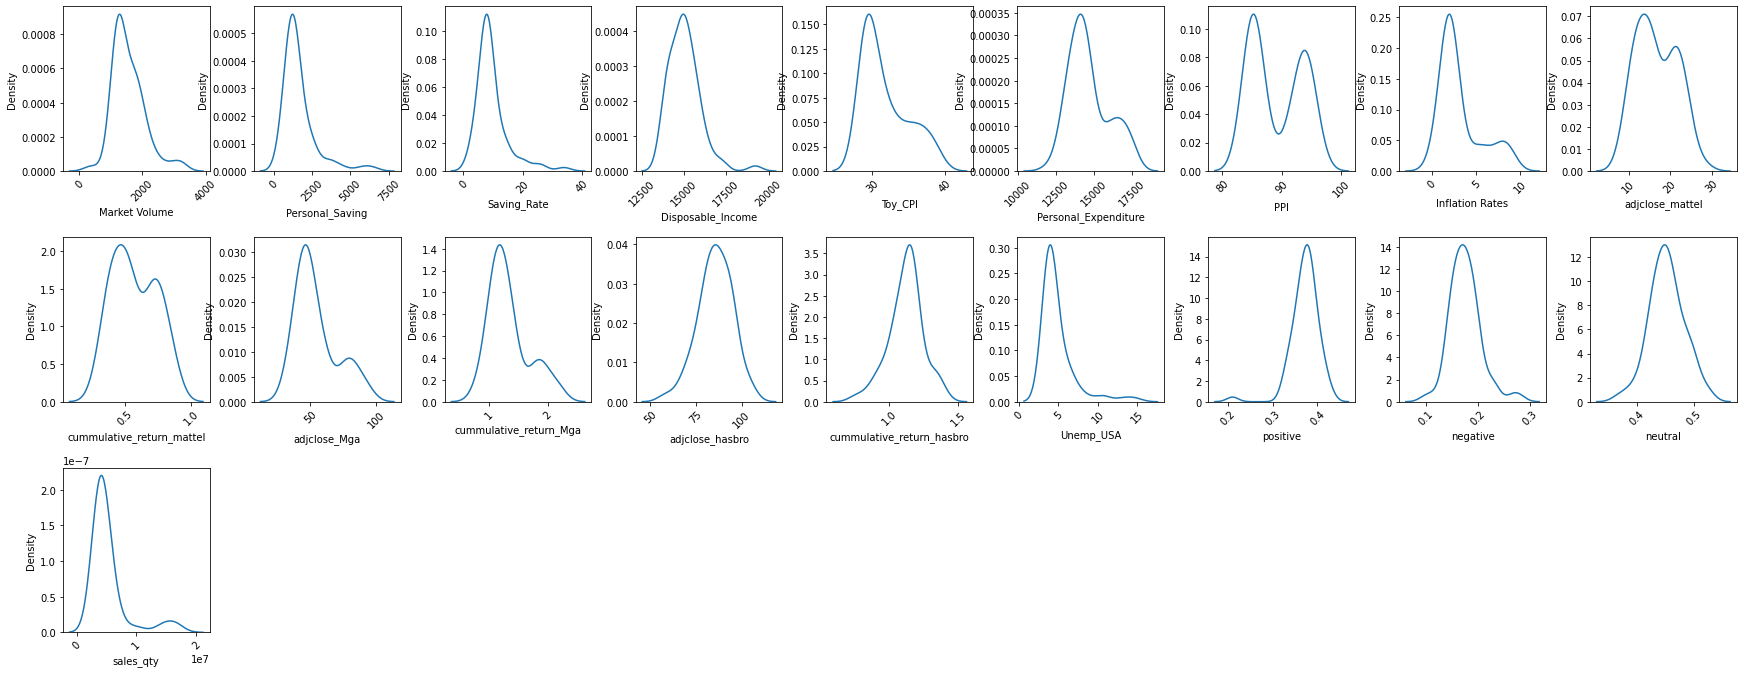

In [ ]:
plt.figure(figsize=(30,20))
for i in enumerate(df_regression_units.columns):
  plt.subplot(5,9,i[0]+1)
  plt.subplots_adjust(hspace=0.4,wspace=0.3)
  sns.kdeplot(i[1],data=df_regression_units)
  plt.xticks(rotation=45)

In [ ]:
for col in df_regression_units.columns[0:-1]:
  df_regression_units[col], fitted_lambda=stats.boxcox(df_regression_units[col])

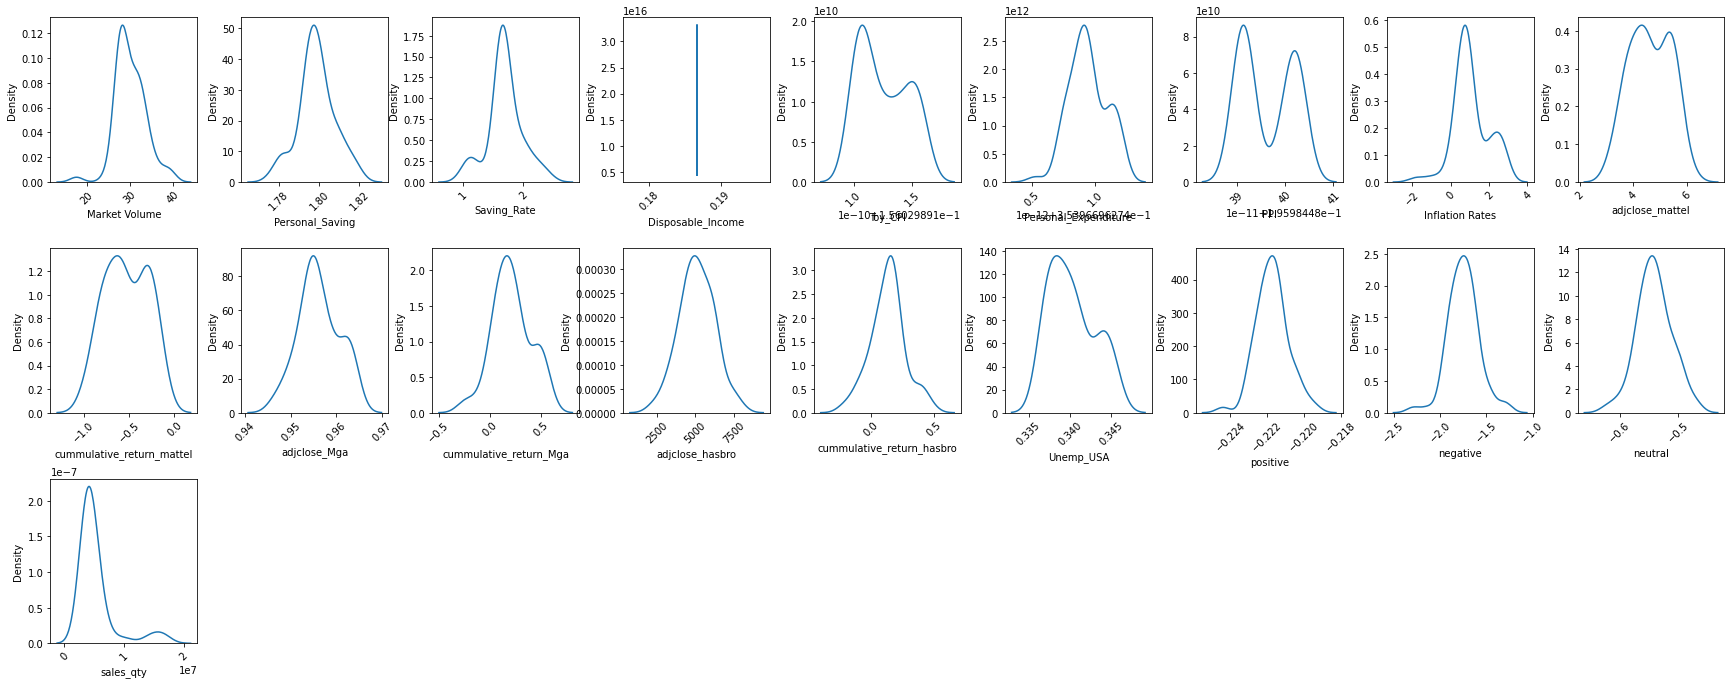

In [ ]:
plt.figure(figsize=(30,20))
for i in enumerate(df_regression_units.columns):
  plt.subplot(5,9,i[0]+1,)
  plt.subplots_adjust(hspace=0.4,wspace=0.3)
  sns.kdeplot(i[1],data=df_regression_units)
  plt.xticks(rotation=45)

### **Add Month**

In [ ]:
df_regression_units['Month'] = df_statistic['Date'].dt.month

In [ ]:
#Dummy Month
df_dummies = pd.get_dummies(df_regression_units['Month'],drop_first=True)

In [ ]:
df_regression_units = pd.concat([df_regression_units,df_dummies],axis = 1)

In [ ]:
df_regression_units.drop('Month',axis=1,inplace=True)

In [ ]:
len(df_regression_units.columns)

30

### **Train-Test-Split**

In [ ]:
X = df_regression_units.drop('sales_qty',axis=1)

In [ ]:
y = df_statistic['sales_qty']

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=25)

### **MinmaxScalar**

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Model**

In [ ]:
LR_sklearn = LinearRegression()
LR_sklearn = LR_sklearn.fit(X_train, y_train)

train_preds_sklearn = LR_sklearn.predict(X_train)
test_preds_sklearn = LR_sklearn.predict(X_test)

print("This is train R2:", r2_score(y_train, train_preds_sklearn)) # train
print("This is test R2:", r2_score(y_test, test_preds_sklearn)) # test

trainMAE = mean_absolute_error(y_train, train_preds_sklearn)
print("This is trainMAE:", trainMAE) # train
testMAE = mean_absolute_error(y_test, test_preds_sklearn)
print("This is testMAE:", testMAE) # test

This is train R2: 0.9815542304017263
This is test R2: 0.7815570872362505
This is trainMAE: 327125.3057445732
This is testMAE: 1017993.0666219097


Correllation Heat Map



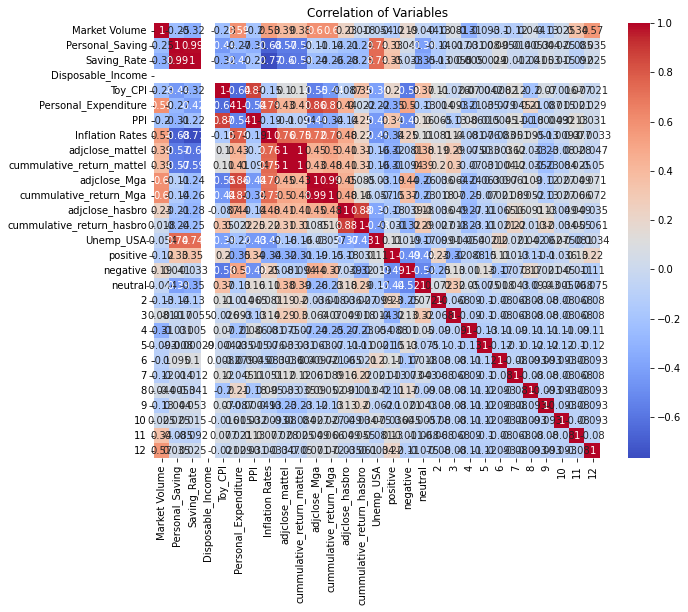


Variance Inflation Factors (VIF)

> 5: Multicollinearity Problem
> 10: Certain Multicollinearity among the variables

-------------------------------------
Market Volume: 442.03592589036555
Personal_Saving: 3940.5249461880317
Saving_Rate: 4248.518115970474
Disposable_Income: nan
Toy_CPI: 273.9631415429009
Personal_Expenditure: 912.2330212690483
PPI: 42.995764025304894
Inflation Rates: 408.6135513553063
adjclose_mattel: 76839.20529680718
cummulative_return_mattel: 74819.91944195551
adjclose_Mga: 22774.238417828154
cummulative_return_Mga: 22344.512784498595
adjclose_hasbro: 2294.0915740238966
cummulative_return_hasbro: 2440.0989253301386
Unemp_USA: 64.45382959457021
positive: 76.4656095617167
negative: 83.3488988635742
neutral: 63.45173351150005
2: 2.4440588252988324
3: 3.220078029968692
4: 3.5514367980044637
5: 3.434505088051484
6: 3.0866080676133665
7: 3.0834732785597643
8: 3.8765333822549515
9: 4.128824663605773
10: 3.6994394375274102
11: 9.121833990593023
12: 18.366935391073536

19 

In [ ]:
feature_names = list(X.columns)

# Plotting a Correlation Matrix Heatmap

print('Correllation Heat Map')
print()
plt.figure(figsize = (10,8))
sns.heatmap(pd.DataFrame(X_train, columns=feature_names).corr(), annot=True,cmap='coolwarm')
plt.title('Correlation of Variables')
plt.show()

print()
print('Variance Inflation Factors (VIF)')
print()
print('> 5: Multicollinearity Problem')
print('> 10: Certain Multicollinearity among the variables')
print()
print('-------------------------------------')

# Calculate VIFs

VIF = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
for idx, vif in enumerate(VIF):
    print('{0}: {1}'.format(feature_names[idx], vif))

# Printing total cases of possible or definite multicollinearity

problem_multicollinearity = sum([1 for vif in VIF if vif > 5])
certain_multicollinearity = sum([1 for vif in VIF if vif > 10])
print()
print('{0} cases of problematic multicollinearity'.format(problem_multicollinearity))
print('{0} cases of certain multicollinearity'.format(certain_multicollinearity))
print()

In [ ]:
X_train_df = pd.DataFrame(X_train, columns=feature_names)

X_test_df = pd.DataFrame(X_test, columns=feature_names)

In [ ]:
X_train_df.drop(['Saving_Rate','adjclose_Mga','cummulative_return_Mga','adjclose_mattel',
                             'cummulative_return_mattel','adjclose_hasbro','cummulative_return_hasbro'],axis=1,inplace=True)
X_test_df.drop(['Saving_Rate','adjclose_Mga','cummulative_return_Mga','adjclose_mattel',
                             'cummulative_return_mattel','adjclose_hasbro','cummulative_return_hasbro'],axis=1,inplace=True)

In [ ]:
feature_names_dropped = X_train_df.columns.to_list()
X_train_dropped = X_train_df.values

VIF = [variance_inflation_factor(X_train_dropped, i) for i in range(X_train_dropped.shape[1])]
for idx, vif in enumerate(VIF):
    print('{0}: {1}'.format(feature_names_dropped[idx], vif))

Market Volume: 349.1972427504441
Personal_Saving: 35.052511102493085
Disposable_Income: nan
Toy_CPI: 122.39209870226382
Personal_Expenditure: 618.9397695106288
PPI: 22.563695814691325
Inflation Rates: 160.9135256466799
Unemp_USA: 31.23729779371138
positive: 39.5274957641261
negative: 27.460173772511077
neutral: 27.259215920696526
2: 1.9491442700332633
3: 2.7232452732165013
4: 2.9012952866373634
5: 2.8375787279384213
6: 2.2427805416073925
7: 2.093418077625999
8: 2.147829652930096
9: 2.3215197858864536
10: 2.4862776891750586
11: 6.575361280242224
12: 13.458169808821603


Correllation Heat Map



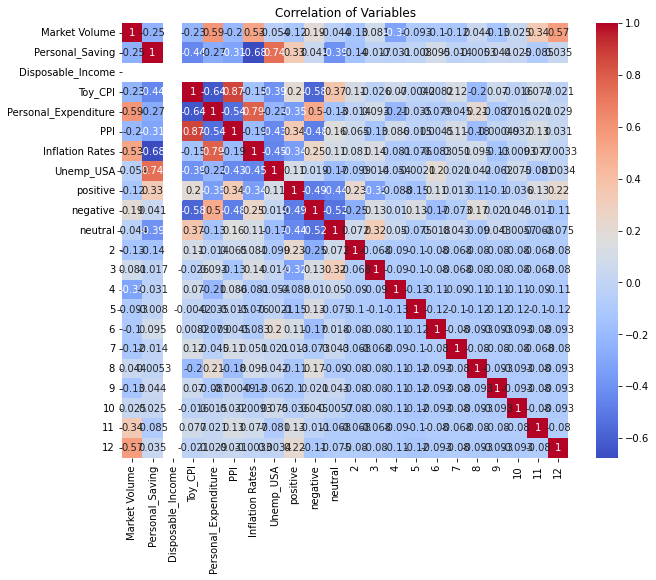

In [ ]:
print('Correllation Heat Map')
print()
plt.figure(figsize = (10,8))
sns.heatmap(pd.DataFrame(X_train_dropped, columns=feature_names_dropped).corr(), annot=True,cmap='coolwarm')
plt.title('Correlation of Variables')
plt.show()

In [ ]:
X_train_dropped_c = sm.add_constant(X_train_dropped)
feature_names_dropped.insert(0,'const')
feature_names_dropped_c = feature_names_dropped

In [ ]:
LR_statsmodels_dropped = sm.OLS(y_train, X_train_dropped_c).fit()

In [ ]:
print(LR_statsmodels_dropped.summary(xname=feature_names_dropped_c))

                            OLS Regression Results                            
Dep. Variable:              sales_qty   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     48.35
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           2.69e-15
Time:                        04:31:56   Log-Likelihood:                -683.28
No. Observations:                  47   AIC:                             1411.
Df Residuals:                      25   BIC:                             1451.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.759e+06 

In [ ]:
X_test_dropped = X_test_df.values
X_test_dropped_c = sm.add_constant(X_test_dropped)

train_preds_sm_dropped = LR_statsmodels_dropped.predict(X_train_dropped_c)
test_preds_sm_dropped = LR_statsmodels_dropped.predict(X_test_dropped_c)

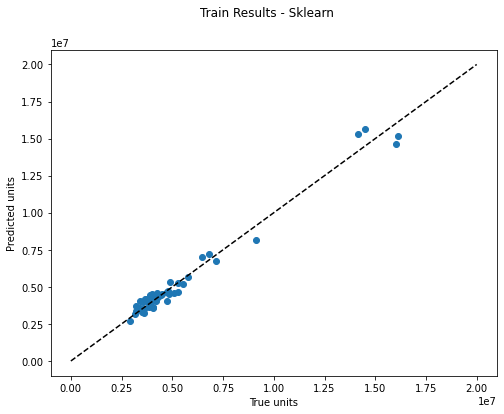

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_train, y=train_preds_sm_dropped)
plt.plot([0, 20000000], [0, 20000000], '--k')
plt.axis('tight')
plt.xlabel('True units')
plt.ylabel('Predicted units')
plt.suptitle('Train Results - Sklearn')
plt.show()

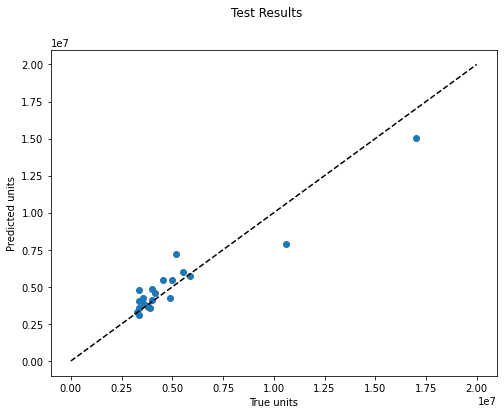

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=test_preds_sm_dropped)
plt.plot([0, 20000000], [0, 20000000], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('True units')
plt.ylabel('Predicted units')
plt.suptitle('Test Results')
plt.show()

####**Check Assumptions**

In [ ]:
df_results = pd.DataFrame({'train_y': y_train, 'train_preds': train_preds_sm_dropped})
df_results['Residuals'] = df_results['train_y'] - df_results['train_preds']

df_results.head()

train_y   train_preds     Residuals
47  14128373  1.530269e+07 -1.174316e+06
6    3602302  3.508800e+06  9.350234e+04
40   3836164  3.662229e+06  1.739352e+05
11  16138855  1.515567e+07  9.831870e+05
59  14479512  1.566441e+07 -1.184893e+06

Anderson Darling: p-value from the test - below 0.05 generally means non-normal: 0.3131013430815525
Anderson Darling: Residuals are normally distributed
Jarque Bera Statistic: 1.0700010210019653 and p-value: 0.5856689911601219


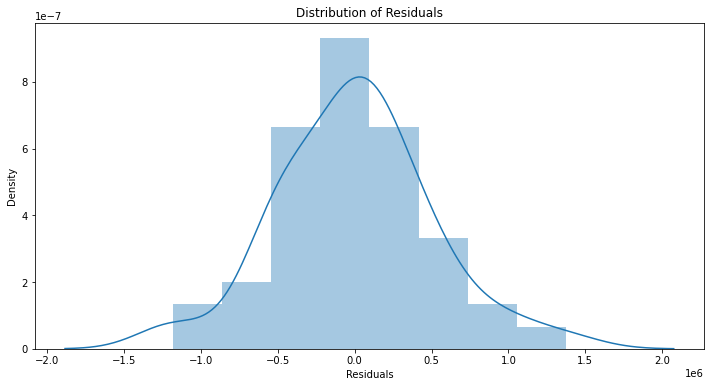


Assumption satisfied


In [ ]:
p_value_thresh = 0.05

p_value = normal_ad(df_results['Residuals'])[1]
print('Anderson Darling: p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Anderson Darling: Residuals are not normally distributed')
else:
    print('Anderson Darling: Residuals are normally distributed')

print(f"Jarque Bera Statistic: {jarque_bera(df_results['Residuals'])[0]} and p-value: {jarque_bera(df_results['Residuals'])[1]}")


# Plotting the residuals distribution

plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()

print()
if p_value > p_value_thresh:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')
    print()
    print('Confidence intervals will likely be affected')
    print('Try performing nonlinear transformations on variables')

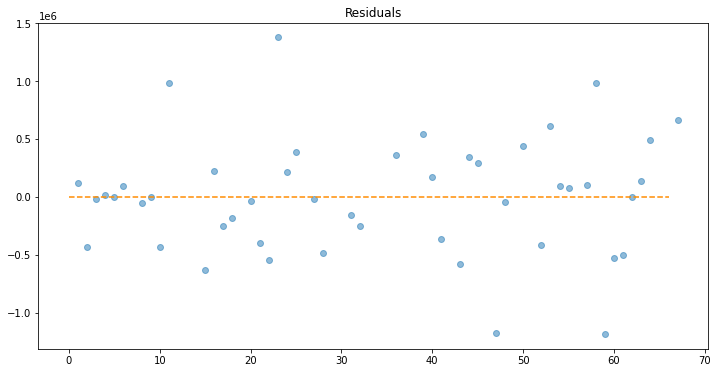

In [ ]:
# Plotting the residuals

plt.subplots(figsize=(12, 6))
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
plt.title('Residuals')
plt.show()

In [ ]:

print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')

durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)

if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.2292882489926904
Little to no autocorrelation 

Assumption satisfied


In [ ]:
print("train R2:", r2_score(y_train, train_preds_sm_dropped)) # train
print("test R2:", r2_score(y_test, test_preds_sm_dropped)) # test

train_mae = mean_absolute_error(y_train, train_preds_sm_dropped)
print("train_mae:", train_mae)

test_mae = mean_absolute_error(y_test, test_preds_sm_dropped)
print("test_mae:", test_mae)

train R2: 0.9759689295211977
test R2: 0.8940571556952164
train_mae: 370863.1123733722
test_mae: 709543.8380771603


## **Model_2_feature_selection (lasso)**

### **Feature Selection**

In [ ]:
df_regression_units = df_statistic[['Market Volume','Personal_Saving','Saving_Rate','Disposable_Income','Toy_CPI','Personal_Expenditure','PPI','Inflation Rates','adjclose_amazon','cummulative_return_amazon',
                        'adjclose_walmart','cummulative_return_walmart','adjclose_target','cummulative_return_target','adjclose_mattel','cummulative_return_mattel','adjclose_Mga',
                        'cummulative_return_Mga','adjclose_hasbro','cummulative_return_hasbro','Unemp_USA','positive','negative','neutral','sales_qty']]

In [ ]:
X = df_regression_units.drop('sales_qty',axis=1)

In [ ]:
y = df_statistic['sales_qty']

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# load data
#X = X_train
#y = y_train

# Use L1 penalty
estimator = LassoCV(cv=5, normalize = True)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=None)

sfm.fit(X, y)

feature_idx = sfm.get_support()
feature_name = X.columns[feature_idx]
feature_name


Index(['Market Volume', 'Saving_Rate', 'Personal_Expenditure',
       'adjclose_mattel', 'cummulative_return_Mga', 'positive', 'negative'],
      dtype='object')

In [ ]:
df_lasso = df_statistic[feature_name]

In [ ]:
df_lasso['Month'] = df_statistic['Date'].dt.month

In [ ]:
#Dummy Month
df_dummies = pd.get_dummies(df_lasso['Month'],drop_first=True)

In [ ]:
df_lasso = pd.concat([df_lasso,df_dummies],axis = 1)

In [ ]:
df_lasso.rename(columns={'Market Volume':'Market Size'},inplace=True)

In [ ]:
df_lasso.drop('Month',axis=1,inplace=True)

In [ ]:
X = df_lasso

In [ ]:
y = df_statistic['sales_qty']

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=25)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
LR_sklearn = LinearRegression()
LR_sklearn = LR_sklearn.fit(X_train, y_train)
train_preds_sklearn = LR_sklearn.predict(X_train)
test_preds_sklearn = LR_sklearn.predict(X_test)
print("This is train R2:", r2_score(y_train, train_preds_sklearn)) # train
print("This is test R2:", r2_score(y_test, test_preds_sklearn)) # test

trainMAE = mean_absolute_error(y_train, train_preds_sklearn)
print("This is trainMAE:", trainMAE) # train
testMAE = mean_absolute_error(y_test, test_preds_sklearn)
print("This is testMAE:", testMAE) # test

This is train R2: 0.9785377376487324
This is test R2: 0.8872195038276798
This is trainMAE: 342215.68868323066
This is testMAE: 698135.2127043045


### **Walk Forward Validation**

train = 1, test=67
This is train R2: nan
This is test R2: -1802959.2644959595
This is trainMAE: 2025645.4725347077
This is testMAE: 3390411665.355821


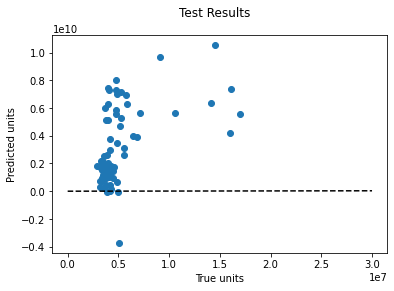

train = 2, test=66
This is train R2: -5.948743330659364
This is test R2: -453201.5416433235
This is trainMAE: 1125595.5347794238
This is testMAE: 1527707824.992056


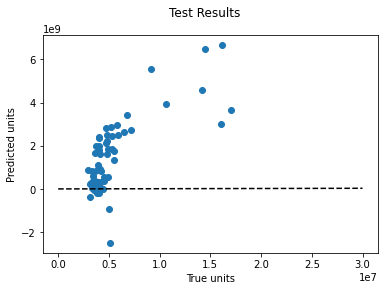

train = 3, test=65
This is train R2: -12.87411495577396
This is test R2: -317.5387959307295
This is trainMAE: 2102634.23150406
This is testMAE: 45295967.74359969


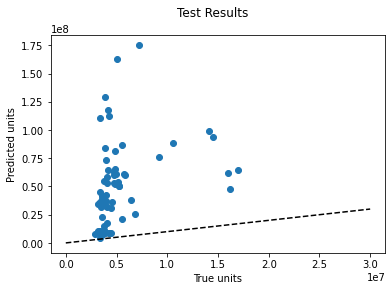

train = 4, test=64
This is train R2: -12.276535675243677
This is test R2: -215.92087306507676
This is trainMAE: 1920037.3627422485
This is testMAE: 38904096.9063542


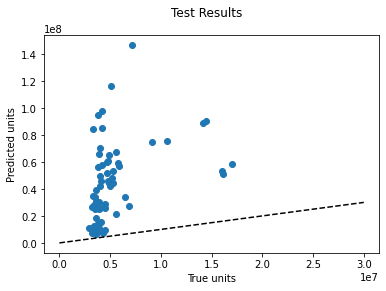

train = 5, test=63
This is train R2: -5.643698974439851
This is test R2: -117.34372873280296
This is trainMAE: 1640641.2426530025
This is testMAE: 30162373.965511397


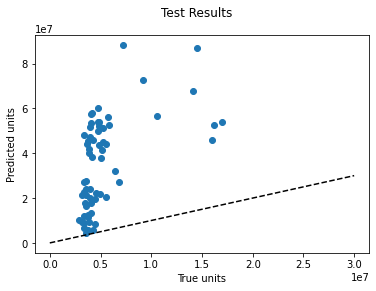

train = 6, test=62
This is train R2: -4.253015503060523
This is test R2: -72.22027963904374
This is trainMAE: 1308604.3538390452
This is testMAE: 23614064.94747583


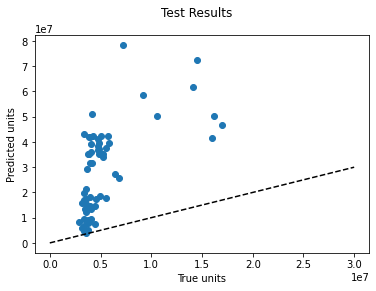

train = 7, test=61
This is train R2: -3.6608517646015404
This is test R2: -65.52758005675564
This is trainMAE: 1123165.8659680358
This is testMAE: 22638302.616343662


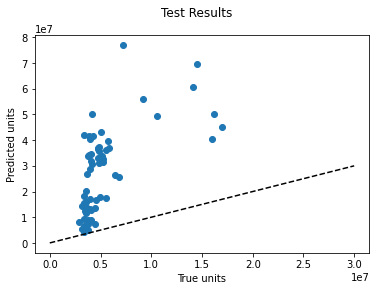

train = 8, test=60
This is train R2: -3.798160680144921
This is test R2: -54.97129561541658
This is trainMAE: 1054670.3429820356
This is testMAE: 20667672.56792542


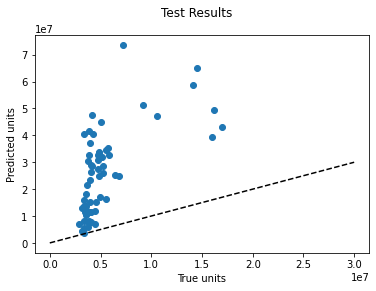

train = 9, test=59
This is train R2: -4.39329749204931
This is test R2: -42.52934086275367
This is trainMAE: 1066219.4139287476
This is testMAE: 17678673.32906806


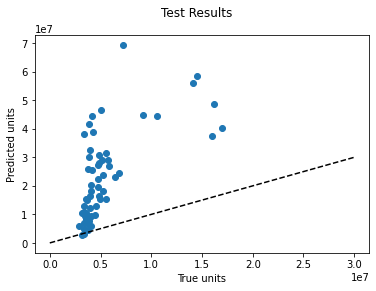

train = 10, test=58
This is train R2: -4.061306515085702
This is test R2: -31.72668652992875
This is trainMAE: 900826.9877118267
This is testMAE: 15091711.521474123


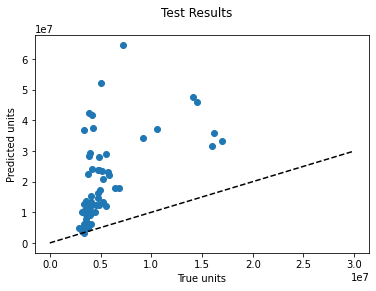

train = 11, test=57
This is train R2: 0.09187023679132944
This is test R2: -19.792110565566144
This is trainMAE: 709305.2517373125
This is testMAE: 10011144.752581548


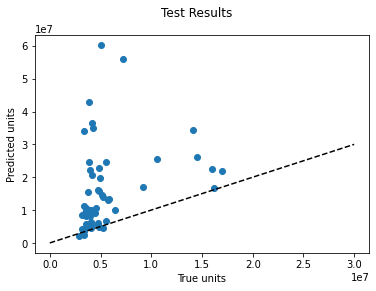

train = 12, test=56
This is train R2: 0.9680459894951541
This is test R2: -7.958081163538328
This is trainMAE: 515819.0696887949
This is testMAE: 6278847.830262154


train = 13, test=55
This is train R2: 0.9676776662196174
This is test R2: -7.968961993226699
This is trainMAE: 508984.7640057771
This is testMAE: 6327691.245451656


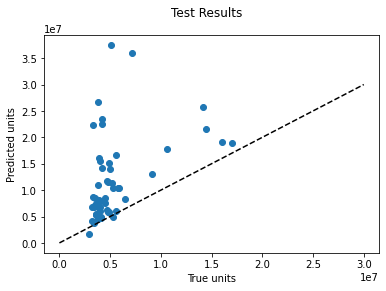

train = 14, test=54
This is train R2: 0.9655362482976078
This is test R2: -7.794105246390085
This is trainMAE: 508232.47113590396
This is testMAE: 6214499.476414115


train = 15, test=53
This is train R2: 0.9622159715210274
This is test R2: -7.509027806298093
This is trainMAE: 509045.4439205108
This is testMAE: 6063455.046017878


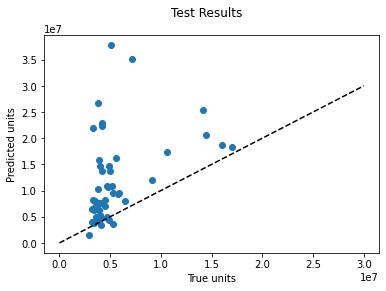

train = 16, test=52
This is train R2: 0.9672755152982309
This is test R2: -7.638804292018403
This is trainMAE: 471289.8955793908
This is testMAE: 6179188.158252612


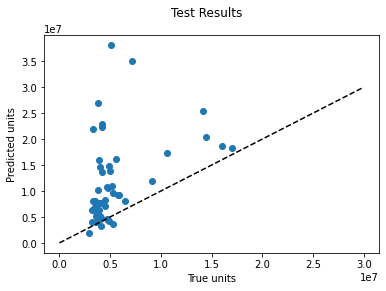

train = 17, test=51
This is train R2: 0.9695160906253479
This is test R2: -8.176574578781524
This is trainMAE: 422283.3316284405
This is testMAE: 6528790.665776226


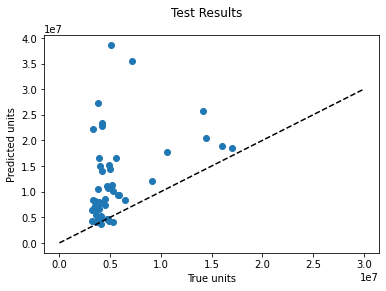

train = 18, test=50
This is train R2: 0.9650599343219519
This is test R2: -8.111586877996068
This is trainMAE: 445838.5939336966
This is testMAE: 6562100.988995944


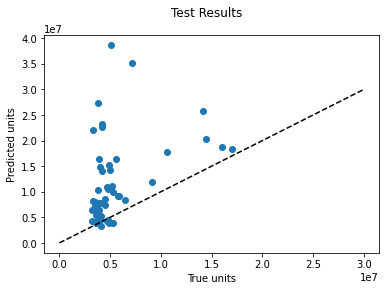

train = 19, test=49
This is train R2: 0.9509830336942191
This is test R2: -8.268072287463026
This is trainMAE: 506928.2779962174
This is testMAE: 6701537.056815076


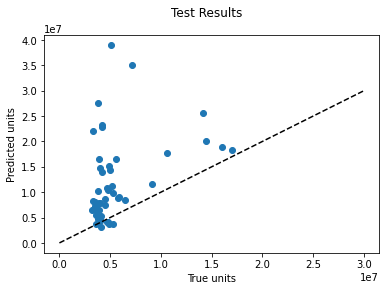

train = 20, test=48
This is train R2: 0.9503936946751366
This is test R2: -8.211820743093766
This is trainMAE: 505731.41454364825
This is testMAE: 6746568.113801413


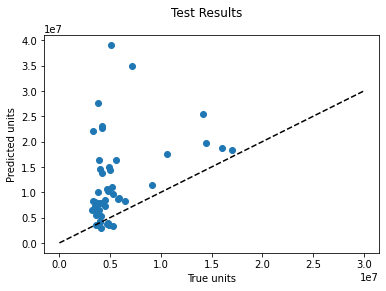

train = 21, test=47
This is train R2: 0.9416985003690157
This is test R2: -8.22509314293851
This is trainMAE: 536814.9578588484
This is testMAE: 6847555.432784011


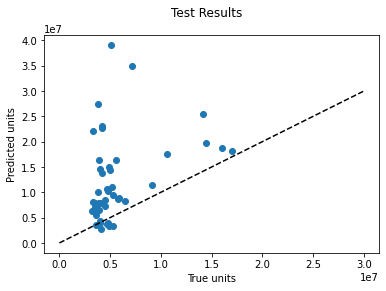

train = 22, test=46
This is train R2: 0.9282941112441149
This is test R2: -8.14471415816357
This is trainMAE: 571868.6486667946
This is testMAE: 6874558.211256593


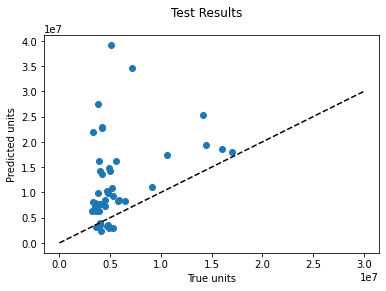

train = 23, test=45
This is train R2: 0.9173662194579097
This is test R2: -8.059645463135793
This is trainMAE: 603795.8016134583
This is testMAE: 6943517.518440504


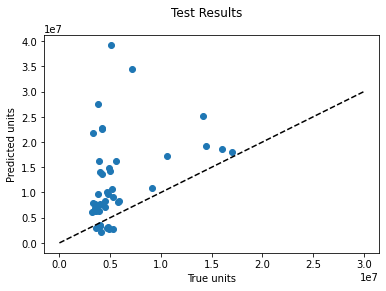

train = 24, test=44
This is train R2: 0.9649412335825703
This is test R2: -1.3798632247308915
This is trainMAE: 555679.8064133407
This is testMAE: 3244794.2296771673


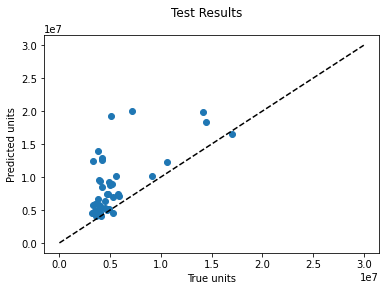

train = 25, test=43
This is train R2: 0.958568396311005
This is test R2: -1.3967888378638489
This is trainMAE: 588916.228379617
This is testMAE: 3288008.273261049


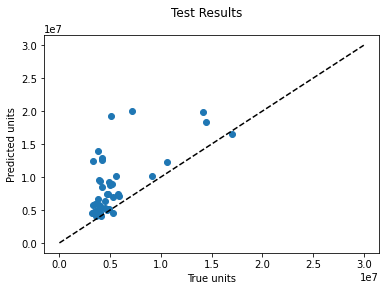

train = 26, test=42
This is train R2: 0.9530430716047499
This is test R2: -1.24103228464182
This is trainMAE: 615632.7973989284
This is testMAE: 3234945.3947815583


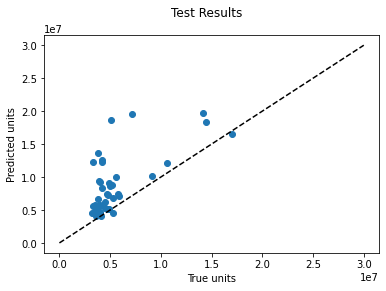

train = 27, test=41
This is train R2: 0.9440640998142256
This is test R2: -1.1737500390907818
This is trainMAE: 649160.39441355
This is testMAE: 3149092.737439686


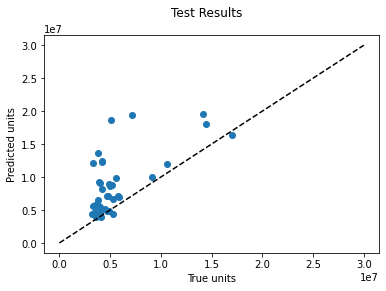

train = 28, test=40
This is train R2: 0.9432678613550659
This is test R2: -1.1494079805365343
This is trainMAE: 648166.3424421496
This is testMAE: 3161992.5924716517


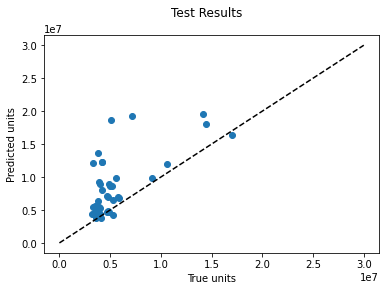

train = 29, test=39
This is train R2: 0.9403703794730709
This is test R2: -1.144726569555404
This is trainMAE: 661345.9687392579
This is testMAE: 3172311.9003184377


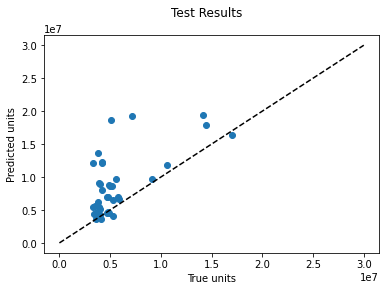

train = 30, test=38
This is train R2: 0.9408063729057706
This is test R2: -1.1290473515076402
This is trainMAE: 653233.0081867285
This is testMAE: 3205997.019548256


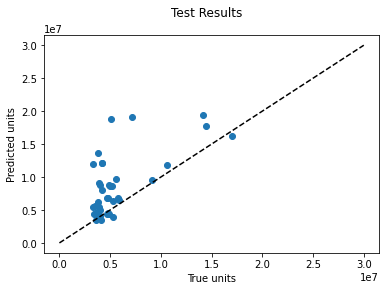

train = 31, test=37
This is train R2: 0.9398132624650586
This is test R2: -1.114609188996138
This is trainMAE: 655540.9517792095
This is testMAE: 3228217.298935516


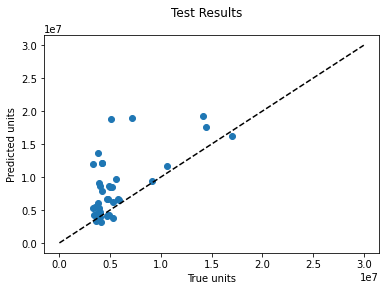

train = 32, test=36
This is train R2: 0.9383726993043093
This is test R2: -1.1255884207858222
This is trainMAE: 658992.9744619806
This is testMAE: 3276216.119593107


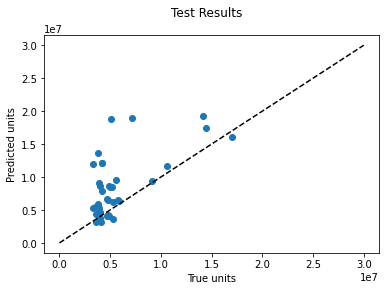

train = 33, test=35
This is train R2: 0.9328101417003772
This is test R2: -1.1309995830797024
This is trainMAE: 677755.7946419665
This is testMAE: 3322382.1965529597


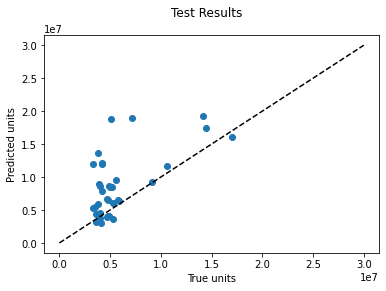

train = 34, test=34
This is train R2: 0.9227365720822809
This is test R2: -1.1356094789115874
This is trainMAE: 707431.0944638661
This is testMAE: 3348707.865066053


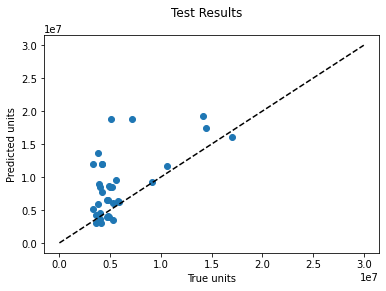

train = 35, test=33
This is train R2: 0.8910607825211471
This is test R2: -1.0921977013538964
This is trainMAE: 771934.6020988465
This is testMAE: 3333925.065494252


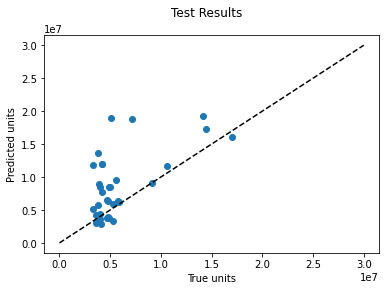

train = 36, test=32
This is train R2: 0.9264947755107391
This is test R2: -2.1474840596618376
This is trainMAE: 779733.6862588652
This is testMAE: 3359865.679923853


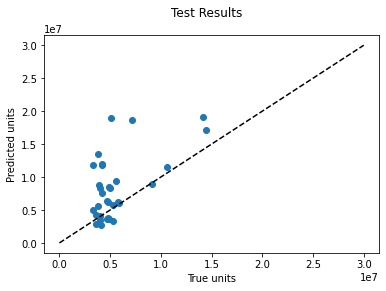

train = 37, test=31
This is train R2: 0.9269096317185894
This is test R2: -2.1827677090027073
This is trainMAE: 770801.8079935235
This is testMAE: 3441840.998591364


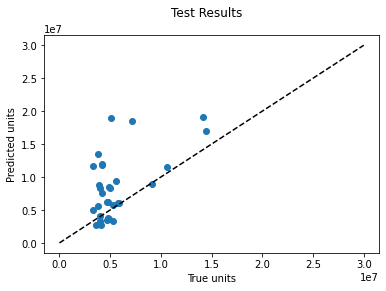

train = 38, test=30
This is train R2: 0.9224811508506336
This is test R2: -2.2237131823609606
This is trainMAE: 789031.8425998784
This is testMAE: 3494789.105567691


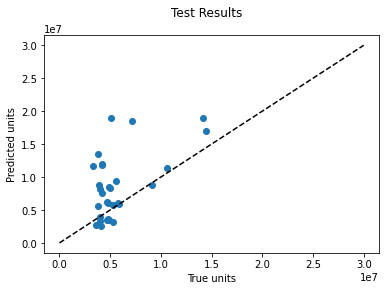

train = 39, test=29
This is train R2: 0.9302070676500093
This is test R2: 0.6141426296776975
This is trainMAE: 735085.122721205
This is testMAE: 1277533.432379006


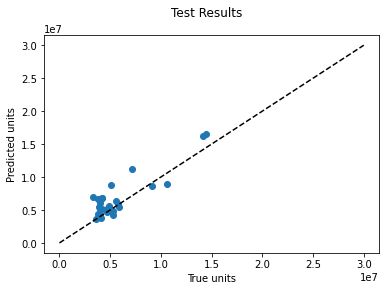

train = 40, test=28
This is train R2: 0.9608831301132389
This is test R2: 0.9107560011507079
This is trainMAE: 485674.6883981634
This is testMAE: 592839.9517250817


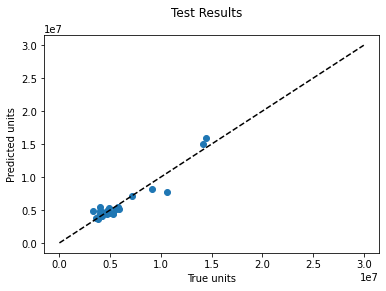

train = 41, test=27
This is train R2: 0.9609980286119312
This is test R2: 0.9094262746885228
This is trainMAE: 476248.97725186544
This is testMAE: 610599.2747706233


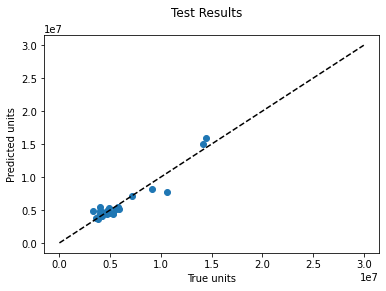

train = 42, test=26
This is train R2: 0.9606615334984261
This is test R2: 0.9092405562683309
This is trainMAE: 474788.0312744078
This is testMAE: 618126.5835618532


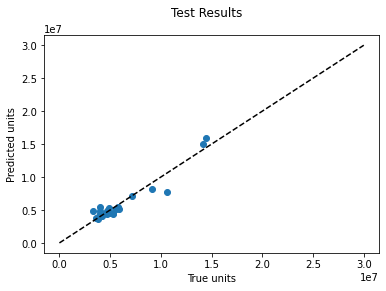

train = 43, test=25
This is train R2: 0.9555282660759534
This is test R2: 0.9177716987913437
This is trainMAE: 500047.1973352797
This is testMAE: 580414.3600286515


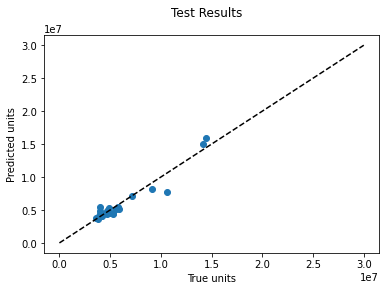

train = 44, test=24
This is train R2: 0.9555271286963668
This is test R2: 0.9163425582333621
This is trainMAE: 493585.81667894754
This is testMAE: 595608.8563441508


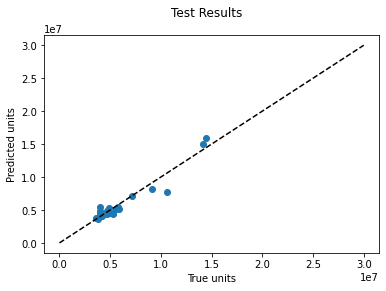

train = 45, test=23
This is train R2: 0.9551047269283023
This is test R2: 0.9172536224202538
This is trainMAE: 492846.10372610705
This is testMAE: 601491.9051503693


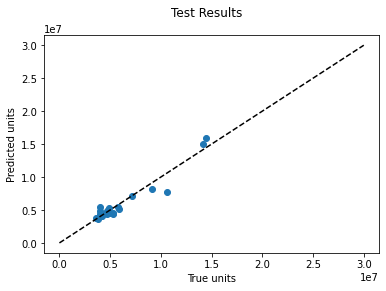

train = 46, test=22
This is train R2: 0.9548332214299524
This is test R2: 0.9172822877516471
This is trainMAE: 489791.7364285176
This is testMAE: 612816.7550191592


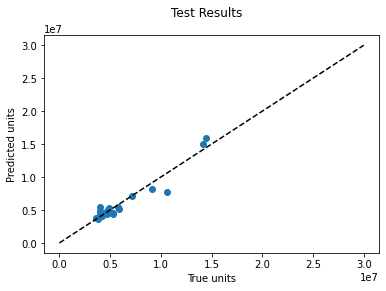

train = 47, test=21
This is train R2: 0.940727070588203
This is test R2: 0.951629803749345
This is trainMAE: 540767.5022871594
This is testMAE: 504586.4704112771


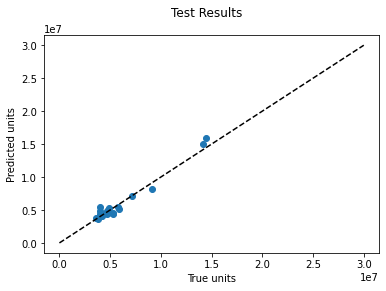

train = 48, test=20
This is train R2: 0.9484631275510733
This is test R2: 0.9278122662698975
This is trainMAE: 542902.6617807705
This is testMAE: 484381.5733646771


train = 49, test=19
This is train R2: 0.9490136541250714
This is test R2: 0.9285599834709433
This is trainMAE: 534294.8398469199
This is testMAE: 491108.94857483543


train = 50, test=18
This is train R2: 0.9495648902938507
This is test R2: 0.9252037793211958
This is trainMAE: 523849.4496781433
This is testMAE: 520841.7439011463


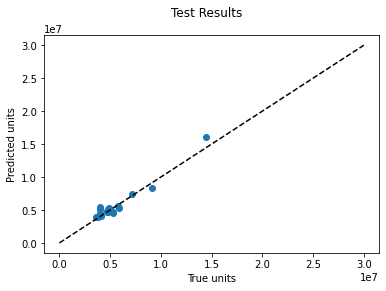

train = 51, test=17
This is train R2: 0.9469491999658158
This is test R2: 0.9285139785994011
This is trainMAE: 529022.5746298734
This is testMAE: 545278.4165594612


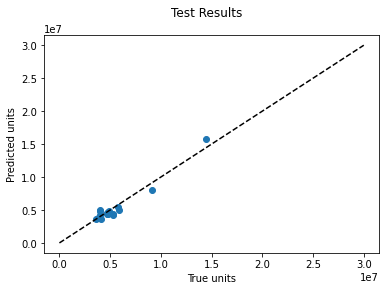

train = 52, test=16
This is train R2: 0.9454057942738576
This is test R2: 0.9347252500405492
This is trainMAE: 537815.2150140756
This is testMAE: 522469.9450498137


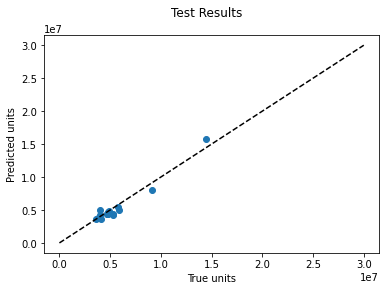

train = 53, test=15
This is train R2: 0.9454462053090911
This is test R2: 0.9322270939931413
This is trainMAE: 529044.7423208866
This is testMAE: 559371.2194270653


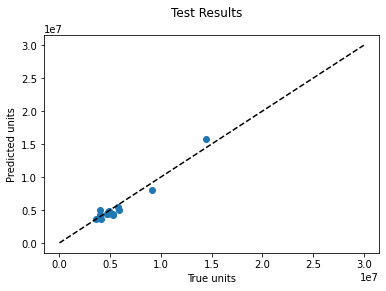

train = 54, test=14
This is train R2: 0.9427989352793996
This is test R2: 0.9354219238306656
This is trainMAE: 545535.4127356516
This is testMAE: 576944.3206001307


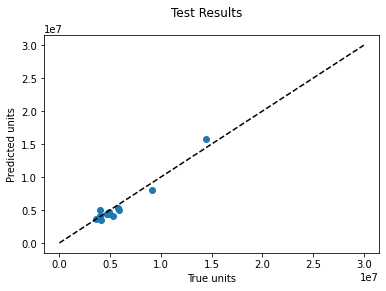

train = 55, test=13
This is train R2: 0.9420429858890619
This is test R2: 0.934671352011871
This is trainMAE: 546960.2226185937
This is testMAE: 605113.3006315016


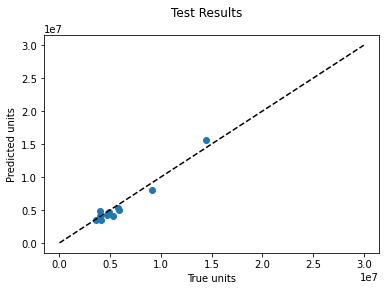

train = 56, test=12
This is train R2: 0.9406719372285891
This is test R2: 0.9336768924848636
This is trainMAE: 553461.9190602202
This is testMAE: 636846.654189813


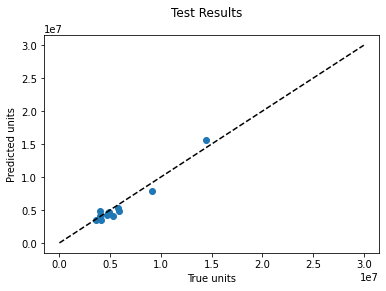

train = 57, test=11
This is train R2: 0.9401761758959394
This is test R2: 0.9460338829607932
This is trainMAE: 551302.8502717421
This is testMAE: 590848.1174618537


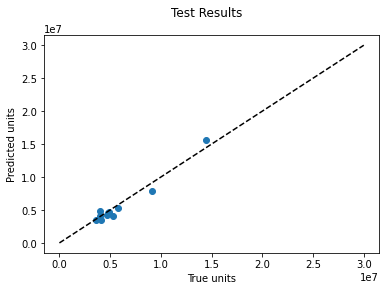

train = 58, test=10
This is train R2: 0.937833496136411
This is test R2: 0.9460096919470209
This is trainMAE: 564898.9910678335
This is testMAE: 623502.026710035


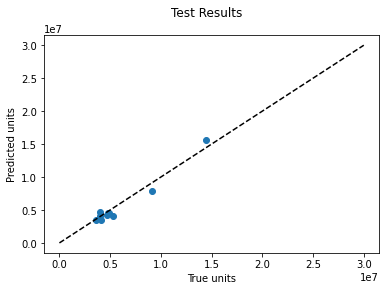

train = 59, test=9
This is train R2: 0.9358680798306727
This is test R2: 0.9559661261149256
This is trainMAE: 582722.3533770586
This is testMAE: 560211.2519433291


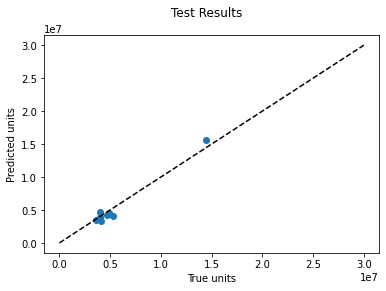

train = 60, test=8
This is train R2: 0.9421043414168417
This is test R2: -0.3046547829304911
This is trainMAE: 590878.1222211879
This is testMAE: 496229.09793314425


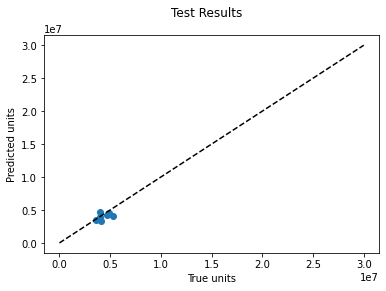

train = 61, test=7
This is train R2: 0.946724684257138
This is test R2: -0.6660422494316189
This is trainMAE: 544204.7300271756
This is testMAE: 505095.68977915094


train = 62, test=6
This is train R2: 0.9467464877273921
This is test R2: -1.2161035577027897
This is trainMAE: 537519.9988989767
This is testMAE: 585177.5153140557


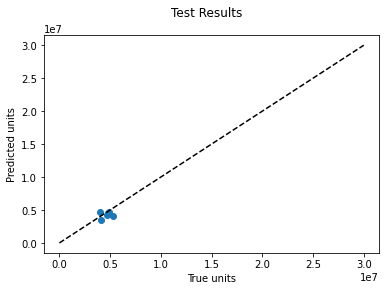

train = 63, test=5
This is train R2: 0.9524702509095727
This is test R2: -0.1013181578837814
This is trainMAE: 469045.99859217973
This is testMAE: 241025.2072004974


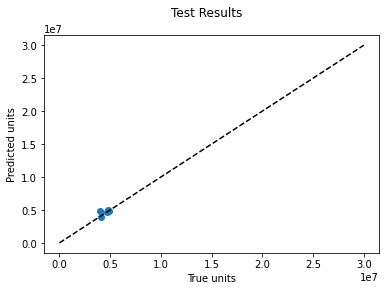

train = 64, test=4
This is train R2: 0.9524821165429289
This is test R2: -0.23794379282491196
This is trainMAE: 463527.5873043053
This is testMAE: 267721.9286634027


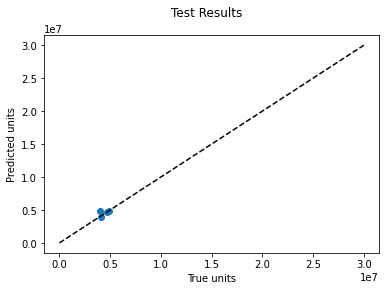

train = 65, test=3
This is train R2: 0.9525593567798338
This is test R2: -0.61774525090486
This is trainMAE: 458315.19843631255
This is testMAE: 309662.5571688069


train = 66, test=2
This is train R2: 0.9526503913504598
This is test R2: -1.6087624950344543
This is trainMAE: 451369.134124993
This is testMAE: 450233.3698369246


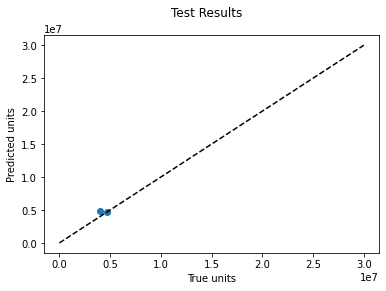

train = 67, test=1
This is train R2: 0.9518293183012122
This is test R2: nan
This is trainMAE: 456588.6352073013
This is testMAE: 99391.03303419799


In [ ]:
train_mae = []
test_mae = []
train_r_2 = []
test_r_2 = []


n_train = 1
n_records = len(X)
for i in range(n_train,n_records,1):
  X_train, X_test = X[0:i],X[i:]
  y_train,y_test = y[0:i],y[i:]
  print('train = %d, test=%d'% (len(y_train),len(y_test)))

  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

#  LR_sklearn = LR_sklearn.fit(X_train, y_train)
  train_preds_sklearn = LR_sklearn.predict(X_train)
  test_preds_sklearn = LR_sklearn.predict(X_test)


  print("This is train R2:", r2_score(y_train, train_preds_sklearn)) # train
  print("This is test R2:", r2_score(y_test, test_preds_sklearn)) # test

  trainMAE = mean_absolute_error(y_train, train_preds_sklearn)
  print("This is trainMAE:", trainMAE) # train
  testMAE = mean_absolute_error(y_test, test_preds_sklearn)
  print("This is testMAE:", testMAE) # test

  plt.figure(figsize=(6, 4))
  plt.scatter(x=y_test, y=test_preds_sklearn)
  plt.plot([0, 30000000], [0, 30000000], '--k') # 45 degree line
  plt.axis('tight')
  plt.xlabel('True units')
  plt.ylabel('Predicted units')
  plt.suptitle('Test Results')
  plt.show()
  test_mae.append(testMAE)
  train_mae.append(trainMAE)
  train_r_2.append(r2_score(y_train, train_preds_sklearn))
  test_r_2.append(r2_score(y_test, test_preds_sklearn))

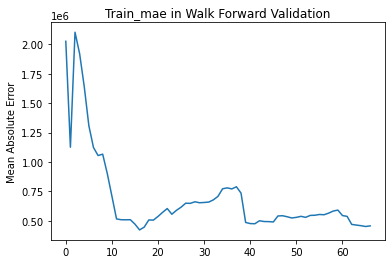

In [ ]:
plt.plot(train_mae)
plt.title('Train_mae in Walk Forward Validation')
plt.ylabel('Mean Absolute Error')
plt.show()

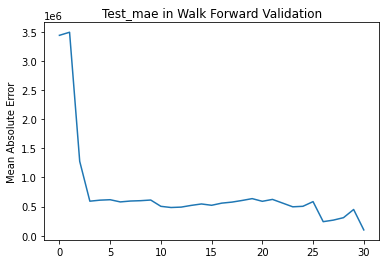

In [ ]:
plt.plot(test_mae[36:])
plt.title('Test_mae in Walk Forward Validation')
plt.ylabel('Mean Absolute Error')
plt.show()

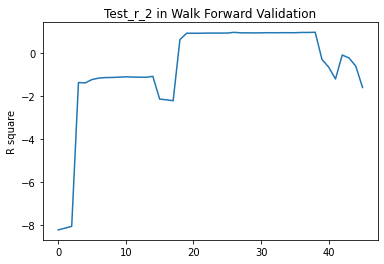

In [ ]:
plt.plot(test_r_2[20:])
plt.title('Test_r_2 in Walk Forward Validation')
plt.ylabel('R square')
plt.show()

In [ ]:
plt.plot(train_r_2)
plt.title('Train_r_2 in Walk Forward Validation')
plt.ylabel('R square')
plt.show()

# **Partial Dependence Plots**

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# to get rid of annoying future warnings...

In [ ]:
!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice, ice_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_X_df = pd.DataFrame(X_train, columns=X.columns)
train_X_df.head()

Market Size  Saving_Rate  Personal_Expenditure  adjclose_mattel  \
0     0.284682     0.126623              0.175163         1.000000   
1     0.284337     0.136364              0.178562         0.835044   
2     0.344234     0.136364              0.188030         0.820048   
3     0.317728     0.139610              0.192661         0.768450   
4     0.307057     0.155844              0.193315         0.676875   

   cummulative_return_Mga  positive  negative    2    3    4    5    6    7  \
0                0.151413  0.818182  0.235514  0.0  0.0  0.0  0.0  0.0  0.0   
1                0.151413  0.901515  0.097196  1.0  0.0  0.0  0.0  0.0  0.0   
2                0.136764  0.603030  0.289720  0.0  1.0  0.0  0.0  0.0  0.0   
3                0.092983  0.583333  0.220561  0.0  0.0  1.0  0.0  0.0  0.0   
4                0.149119  0.677273  0.242991  0.0  0.0  0.0  1.0  0.0  0.0   

     8    9   10   11   12  
0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0

In [ ]:
tmpdf = ice(data=train_X_df, column='Market Size',
                   predict=LR_sklearn.predict)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Market Size')
plt.ylabel('Sales Quantity')
plt.xlabel('Market Size');
plt.show()

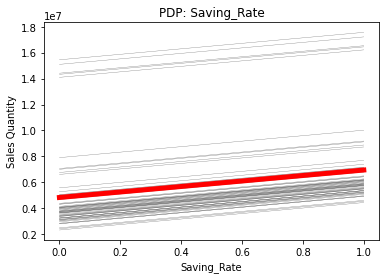

In [ ]:
tmpdf = ice(data=train_X_df, column='Saving_Rate',
                   predict=LR_sklearn.predict)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Saving_Rate')
plt.ylabel('Sales Quantity')
plt.xlabel('Saving_Rate');
plt.show()

# **Feature Importance**

## **Permutation**

In [ ]:
rename = {2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
X.rename(columns = rename,inplace=True)

In [ ]:
model2 = LinearRegression()
model2.fit(X, y)

LinearRegression()

In [ ]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model2, X, y)

plt.figure(figsize=(6, 5))
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Linear Regression Permutation Importance")

Text(0.5, 0, 'Linear Regression Permutation Importance')

## **Sharp Value**

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 3.3 MB/s 


In [ ]:
import shap
LR = LinearRegression()
model = LR.fit(X,y)
# Fits the model on the data
#model.fit(X_train, y_train)
explainer = shap.Explainer(model, masker=shap.maskers.Impute(data=X),
                           feature_names=X.columns, algorithm="linear")
#explainer = shap.Explainer(model,X_test)
shap_values = explainer.shap_values(X)



Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")